<a href="https://colab.research.google.com/github/amirhnazerii/DS_prep/blob/main/Transformer_and_Attention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Self-Attention Deep Dive

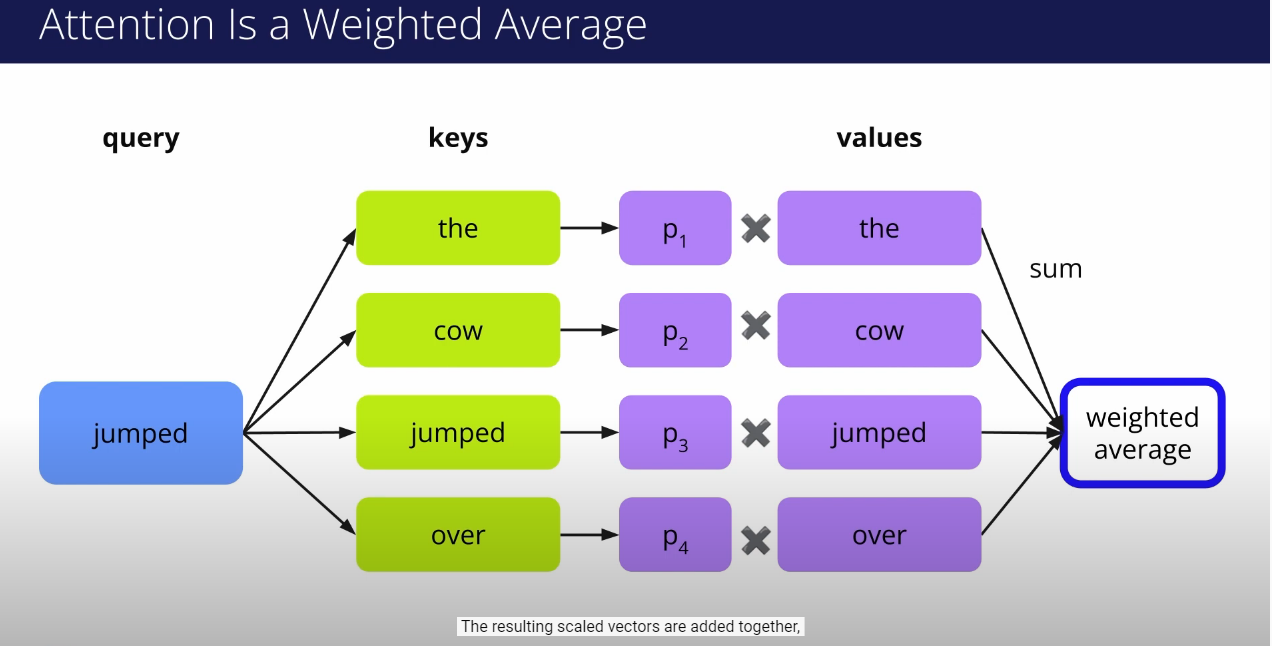

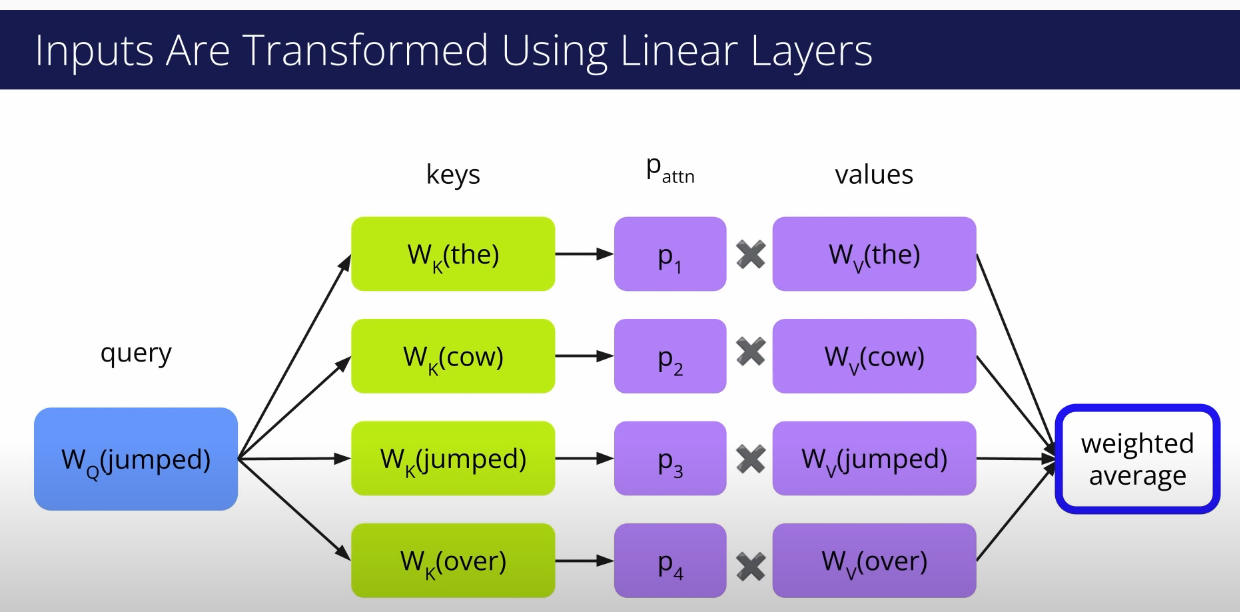

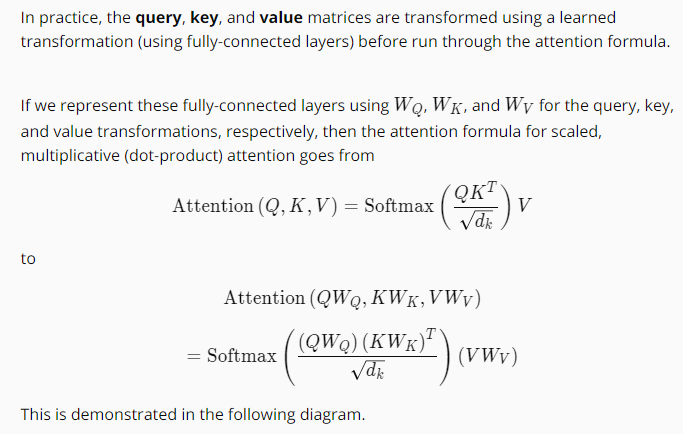

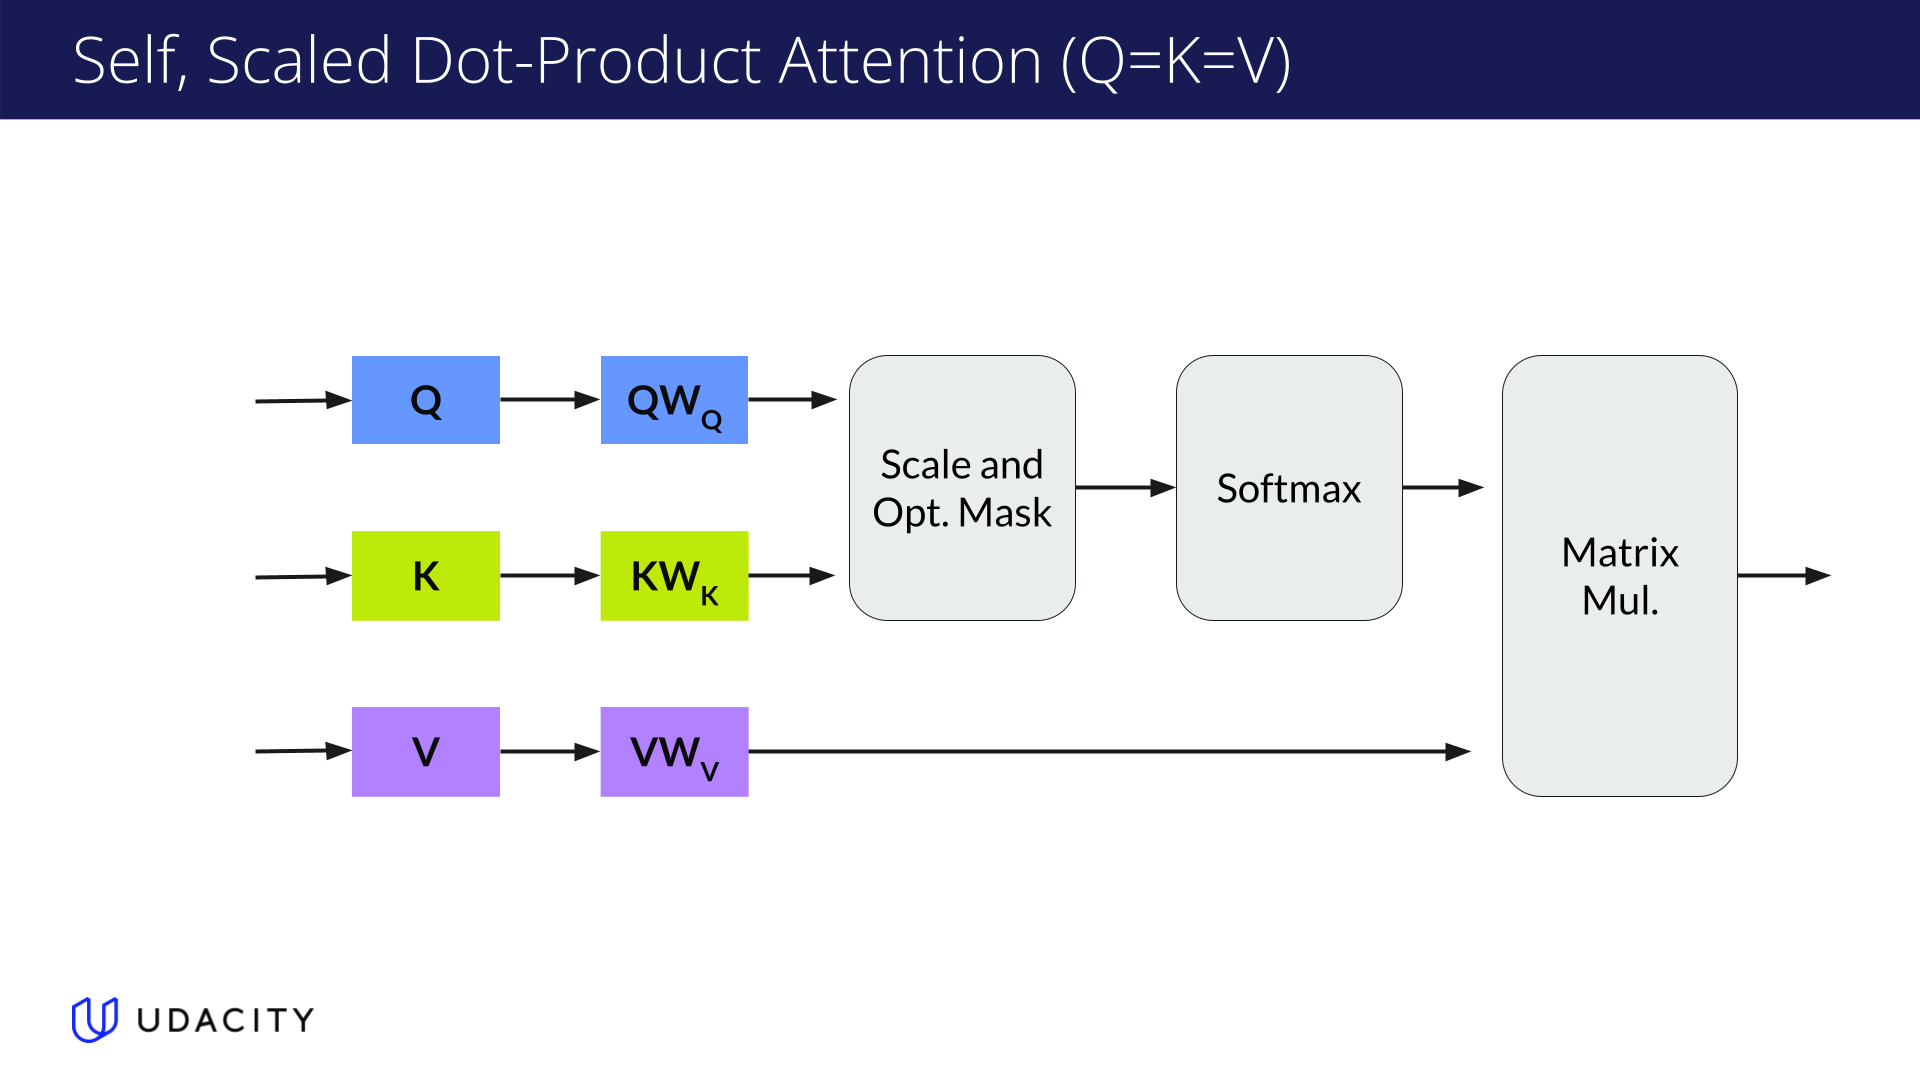

For self-attention, the Q, K, and V matrices are actually identical. For self-attention, they are obtained from token embeddings, which are the output of the previous neural network layer.

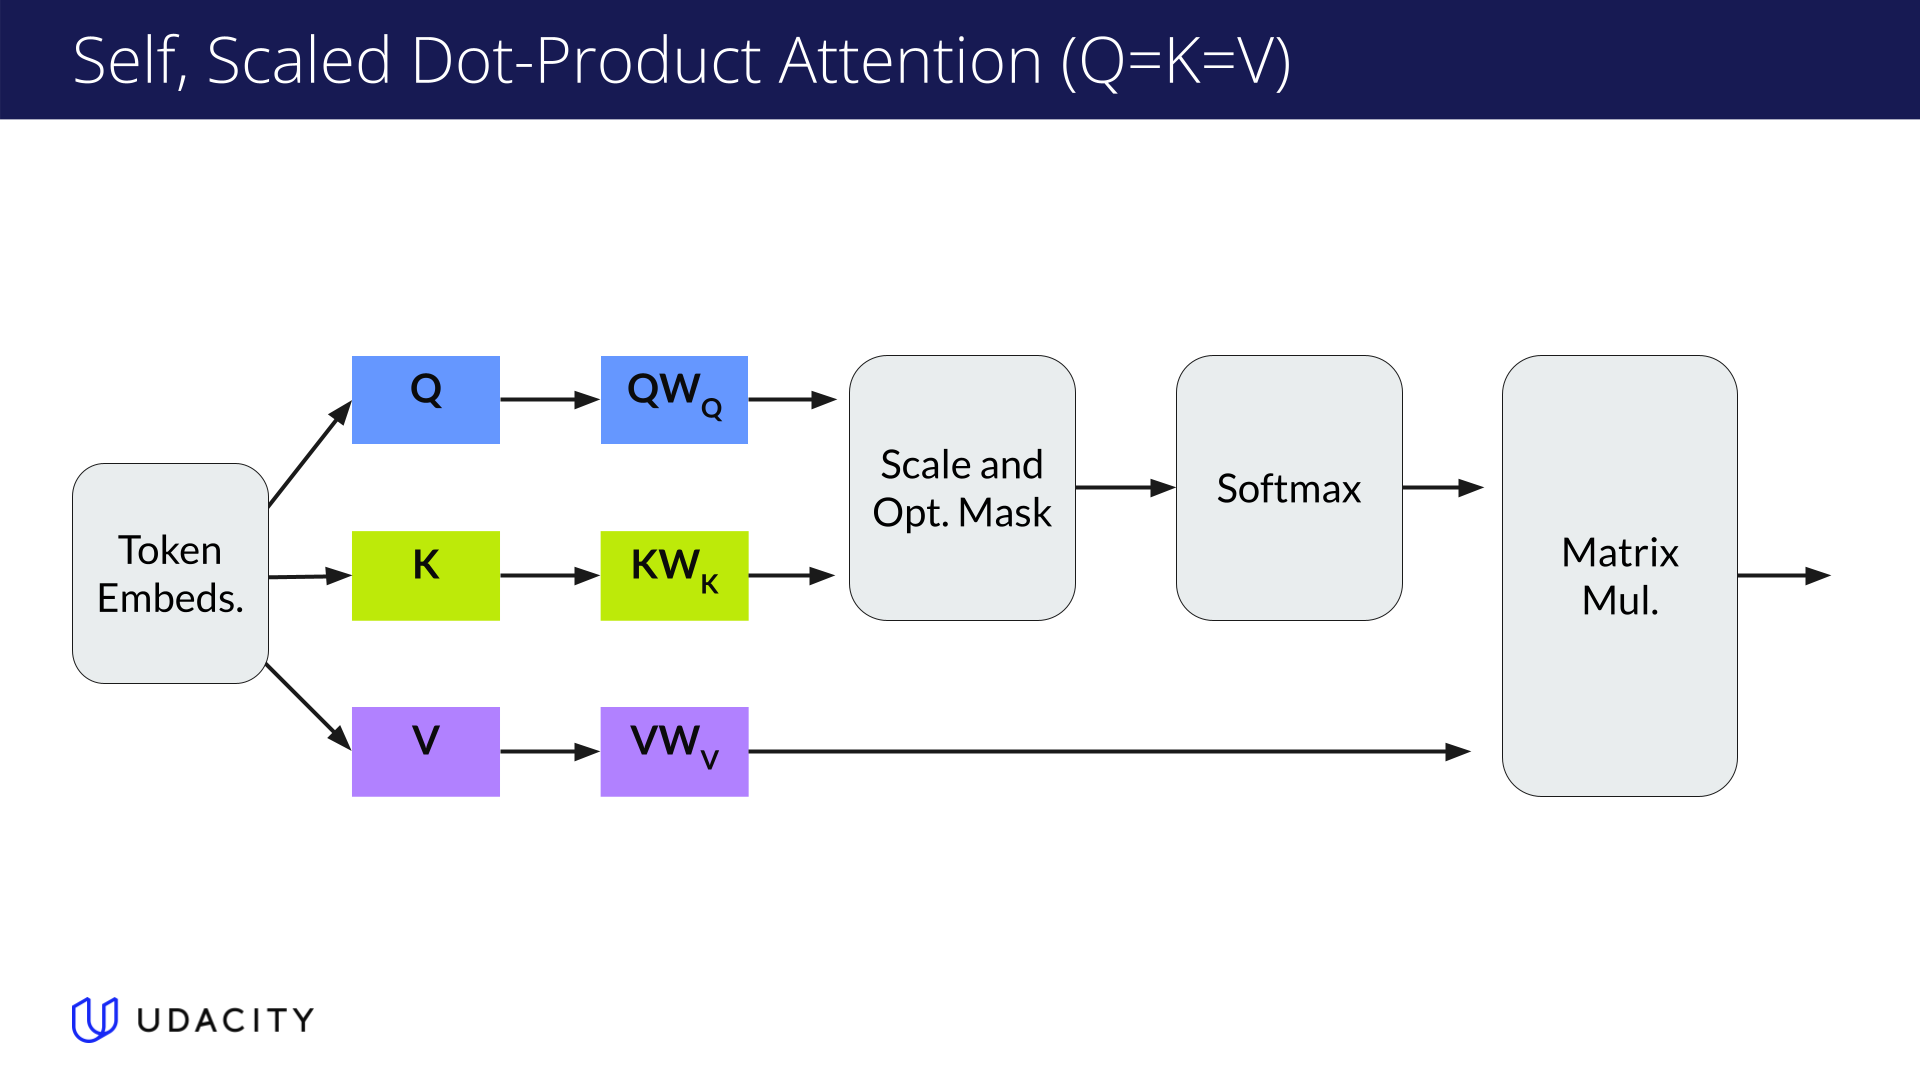

## An Important Note about Q, K, and V in Code
Sometimes people will use Q, K, and V to refer to the attention arguments before the linear transformation is applied and sometimes they will use Q, K, and V to refer to the values post-transformation.

In this lesson we are using the former notation, and in the Python code in the exercises, as is customary in Transformer code implementations, q, k, and v refer to the values after the transformation.

For instance, the following implementation of self-attention uses query, key, and value to refer to the values after the linear transformation is applied.

In [1]:
def attention(query, key, value):
    "Compute 'Scaled Dot Product Attention'"
    d_k = query.size(-1)
    scores = torch.matmul(query, key.transpose(-2, -1)) / math.sqrt(d_k)
    p_attn = scores.softmax(dim=-1)
    return torch.matmul(p_attn, value)

# Attention Mechanism and Self-Attention Summary

In the attention mechanism, a **query** is matched against multiple **keys**, and the strength of these matches determines how much each **value** contributes to the output.

- **Dot Product Attention** works by:
  - Taking the dot product of a query vector with different key vectors, producing scalar values.
  - These scalar values are passed through a **softmax function** to create a probability distribution over the keys.
  - The **value vectors** are then scaled by these probabilities and summed to get a weighted average.

- Before attention calculation, words are transformed using a **fully connected layer**, and the **query, key, and value embeddings** are generated by multiplying the original embeddings by transformation matrices (W_Q, W_K, W_V). Thus, the same word will have different embeddings in the query and key spaces.

- The original 2017 paper formula for attention shows how the matrices **Q** (queries), **K** (keys), and **V** (values) are packed together to compute the attention function simultaneously. The attention function is applied to these matrices after transforming them using learned weights (**W_Q**, **W_K**, **W_V**).

- The **scaled dot product attention** formula:
  - Scales the dot product of Q and K for more stable gradients.
  - Optionally applies a **mask**.
  - Uses a **softmax function** to convert the values into probability distributions, which are used to weight the value vectors.

## Self-Attention

- In **self-attention**, Q, K, and V all come from the same list of embeddings (token embeddings plus positional embeddings). The learned transformations (W_Q, W_K, W_V) make them different.
  
- The output of the attention mechanism has the same shape as the input, allowing it to be used across multiple layers of the transformer. As the token embeddings pass through these layers, they gain more contextual information from neighboring tokens.

- After several attention layers, a **classification head** is applied:
  - For tasks like **sentiment classification**, it predicts between two classes.
  - For **autoregressive tasks** (like GPT models), it predicts the next token.

This is how self-attention works in modern large language models.


# From Attention to Transformer:

## Attention drawbacks:

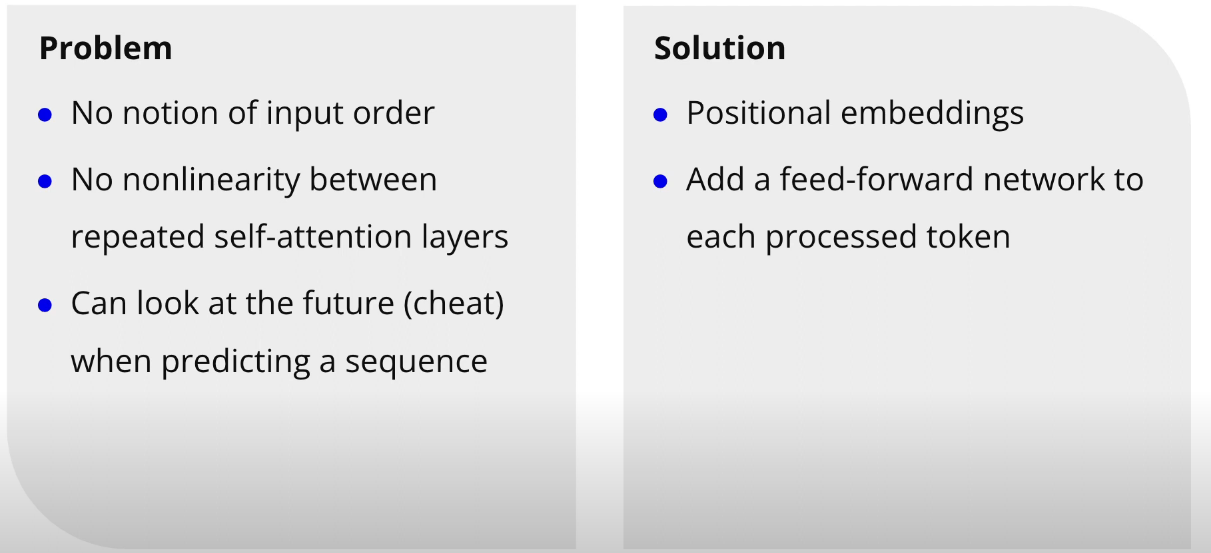